In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,OrdinalEncoder
from xverse.transformer import WOE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[15,8]

In [2]:
from scipy.stats import ttest_ind

In [3]:
%matplotlib inline

* Describing Original Data

In [4]:
df = pd.read_csv('train (3).csv')

In [5]:
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [6]:
df.shape

(69713, 22)

* Data has 69713 rows and 22 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

* We need to change DOB data type to datetime and further extract information from it.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Employer_Category2,65415.0,3.720187,0.807374,1.00,4.00,4.0,4.0,4.0
Monthly_Income,69713.0,5622.283200,174767.061840,0.00,1650.00,2500.0,4000.0,38383838.3
Existing_EMI,69662.0,360.928751,2288.517927,0.00,0.00,0.0,350.0,545436.5
Loan_Amount,42004.0,39429.982859,30727.595990,5000.00,20000.00,30000.0,50000.0,300000.0
Loan_Period,42004.0,3.890629,1.167491,1.00,3.00,4.0,5.0,6.0
Interest_Rate,22276.0,19.213570,5.847136,11.99,15.25,18.0,20.0,37.0
EMI,22276.0,1101.466242,752.661394,118.00,649.00,941.0,1295.0,13556.0
Var1,69713.0,3.948446,3.819214,0.00,0.00,2.0,7.0,10.0
Approved,69713.0,0.014631,0.120073,0.00,0.00,0.0,0.0,1.0


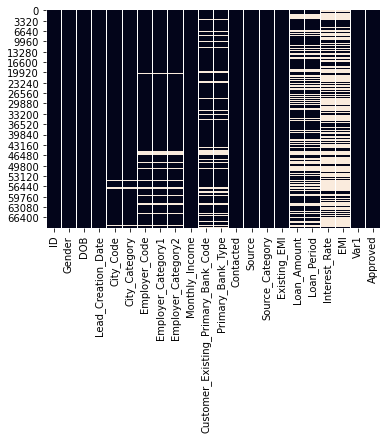

In [9]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [10]:
pd.DataFrame({'Null':df.isnull().sum(),'Null_percent':df.isnull().sum()/df.shape[0]})

,Null,Null_percent
ID,0,0.000000
Gender,0,0.000000
DOB,15,0.000215
Lead_Creation_Date,0,0.000000
City_Code,814,0.011676
City_Category,814,0.011676
Employer_Code,4018,0.057636
Employer_Category1,4018,0.057636
Employer_Category2,4298,0.061653
Monthly_Income,0,0.000000


* Most of our null values exist in Interest Rate, EMI, Loan Amount and Loan Period


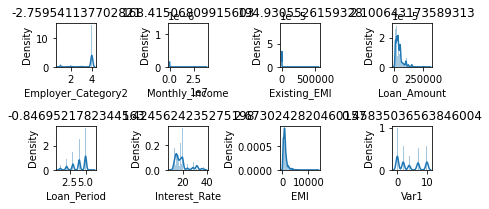

In [11]:
j=1
for i in df.drop('Approved',axis=1).select_dtypes(include=np.number):
    plt.subplot(3,4,j)
    plt.title(df[i].skew())
    sns.distplot(df[i])
    j=j+1
plt.tight_layout()
plt.show()

## Inferences for numerical data


   * -------------------------------------------------------------------------------------------------------------------- *

 #### Monthly Income
* It is highly right skewed.
* It might be because of few very high income leads.
 #### Employer_Category2
* Most of the leads seem to be in category:4 , followed by category:1.
 #### Existing EMI
* It is highly right skewed.
* Most of the leads don't have any existing Emis.
 #### Interest Rate
* It is right skewed.
* Most of the leads are to be offered interest rate between approx 10%-25% per annum.
* It is having a range from 10%-40% per annum (*approx).
 #### EMI
* It is right skewed.
* Most of the leads are to be offered EMI below 5000 Dollars.
 #### Loan Period
* Most of the leads have requested for a repayment tenure of 5 years followed by 4 years.
* Other Repayment tenures are for 1 , 2 , 3 years respectively according to the increasing density of leads.
 #### Var1
* This seems to be an anonymous rating given to the leads by the bank.
* Most of the leads are given a rating of 0.
 #### Loan Amount
* It is highly positively/right skewed.
* The loan amount requested by most of the leads is less than 100,000 dollars.





In [12]:
df_cat=df.drop(['ID','DOB','City_Code','Employer_Code','Customer_Existing_Primary_Bank_Code','Source','Lead_Creation_Date'],axis=1).select_dtypes(include=object)

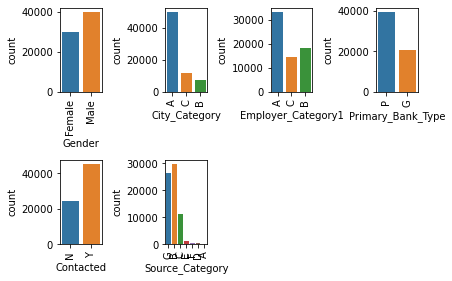

In [13]:
i = 1
for x in df_cat.columns:
    plt.subplot(2, 4, i)
    sns.countplot(df[x])
    plt.xticks(rotation=90)
    i += 1
plt.tight_layout()


## Inferences for categorical data


* -------------------------------------------------------------------------------------------------------------------- *  
#### Gender
* More than 50% of the leads are Males.
#### City Category
* Most of the leads fall in city category:A followed by C.
#### Employer Category 1
* Most of the leads have employer category as A followed by B.
#### Primary Bank Type
* As per our understanding the two categories (P and G) can be interpreted as PRIVATE and GOVERNMENT
* Approx more than 60% of the leads are having their primary bank type as PRIVATE.
#### Contacted
* Approx more than 55% of the leads have been contacted by the bank.
#### Source Category
* Most of the leads are in source category B, G, C respectively as per increasing density of leads.


0    68693
1     1020
Name: Approved, dtype: int64


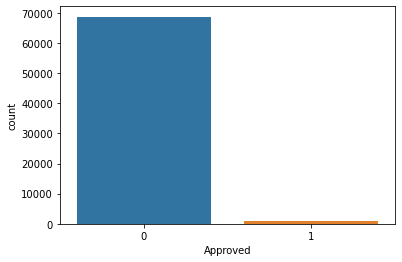

In [14]:
sns.countplot(df.Approved)
print(df.Approved.value_counts())
plt.show()

#### Approved
* The target variable is highly imbalanced

# Trying to identify patterns in the data (if any)

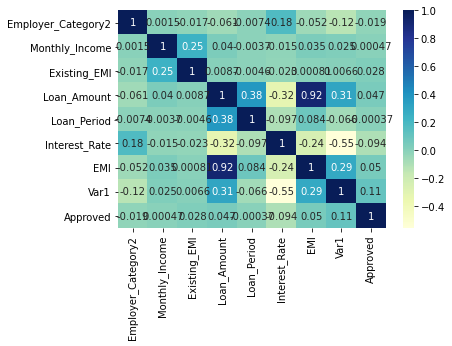

In [15]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

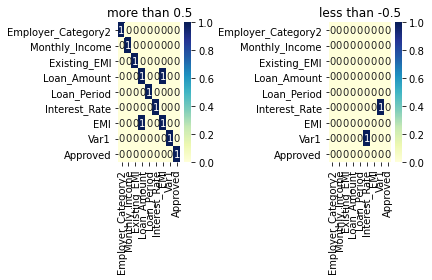

In [16]:


plt.subplot(1,2,1)
plt.title('more than 0.5')
sns.heatmap(df.corr()>0.5,annot=True,cmap='YlGnBu')
plt.subplot(1,2,2)
plt.title('less than -0.5')
sns.heatmap(df.corr()<(-0.5),annot=True,cmap='YlGnBu')
plt.tight_layout()
plt.show()

* Emi and loan amount have  strong positive correlation 
* var1 and interest rate have negative correlation

In [17]:
city=pd.DataFrame(df.groupby(['City_Category','City_Code'])['ID'].count()).reset_index()

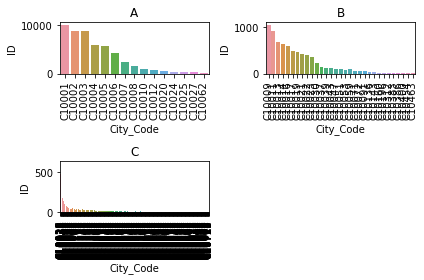

In [18]:
j=1
for i in city.City_Category.unique():
    plt.subplot(2,2,j)    
    plt.title(i)
    sns.barplot(data=city[city.City_Category==i],x='City_Code',y='ID')
    plt.xticks(rotation=90)
    j=j+1
plt.tight_layout()    
plt.show()

In [19]:
c_c=pd.DataFrame(df.groupby('City_Category')['City_Code'].nunique()).reset_index()

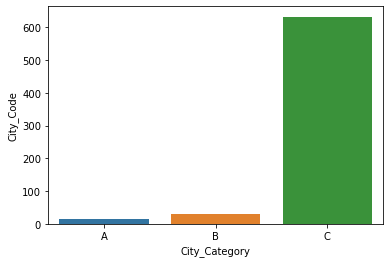

In [20]:
sns.barplot(data=c_c,x=c_c.City_Category,y=c_c.City_Code)
plt.show()

* As the numercal value of city codes(cities) is increaing the no. of leads are decreasing
* City_Category A has the highest no. of leads in our data.
* City_category : C has the maximum no. of cities followed by Category : B and the least in category : A

In [21]:
mi_city=pd.DataFrame(df.groupby(['City_Category'])['Monthly_Income'].median()).reset_index()
mi_city.head()

,City_Category,Monthly_Income
0,A,2500.0
1,B,2129.4
2,C,2100.0


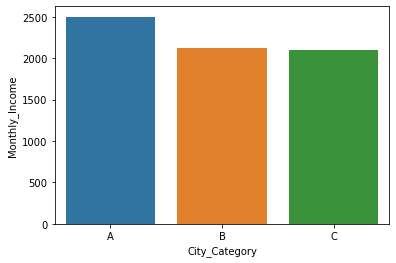

In [22]:
sns.barplot(x=mi_city.City_Category,y=mi_city.Monthly_Income)   
plt.show()

* It is observed that the income of leads from city_cat:A is more than income of leads from city_cat:B is more than city_cat:C.
* But the difference is not so significant , so we cannot demographically divide city cat on basis of income.

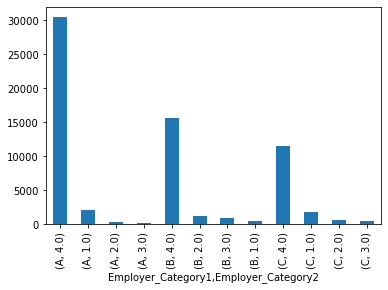

In [23]:
df.groupby('Employer_Category1')['Employer_Category2'].value_counts().plot(kind='bar')
plt.show()


* Employer category2 :4 has highest no. of leads across employer category:1
* Employer cat1 A>B>C considering no. of leads from them 

In [24]:
df.columns

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')

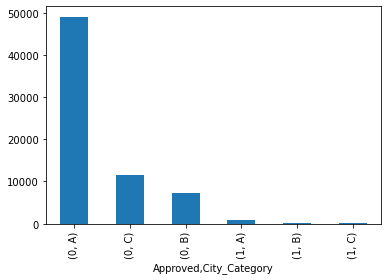

In [25]:
df.groupby('Approved')['City_Category'].value_counts().plot(kind='bar')
plt.show()


* Maximum approval of loan of Leads from City_cat A , this must be because of the density of the leads in the category 

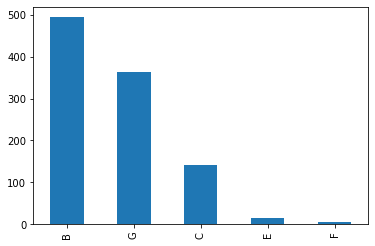

In [26]:
df.loc[df.Approved==1,['Source','Source_Category']].Source_Category.value_counts().plot(kind='bar')
plt.show()

* Most leads are converted from Source Category B,G and C.

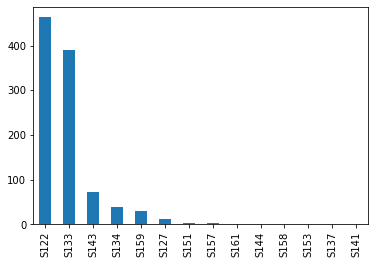

In [27]:
df.loc[df.Approved==1,['Source','Source_Category']].Source.value_counts().plot(kind='bar')
plt.show()

* Most leads are coming from S122 and S133.

In [28]:
ttest_ind(df.Var1,df.Approved) 

Ttest_indResult(statistic=271.8205242225609, pvalue=0.0)

* Var1 may be related as Credit Score of Applicant.

credit score depends on monthly income , interest rate , credit history , loan period , existing EMI 

In [29]:
ttest_ind(df.Var1,df.Monthly_Income) 

Ttest_indResult(statistic=-8.487991051562533, pvalue=2.1225944379449128e-17)

In [30]:
ttest_ind(df.Var1,df.Interest_Rate.dropna()) 

Ttest_indResult(statistic=-451.08207853024356, pvalue=0.0)

In [31]:
ttest_ind(df.Var1,df.Loan_Period.dropna()) 

Ttest_indResult(statistic=3.0187466149509157, pvalue=0.002538799592430339)

In [32]:
ttest_ind(df.Var1,df.Existing_EMI.dropna()) 

Ttest_indResult(statistic=-41.18567803017448, pvalue=0.0)

In [36]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [37]:
anova_lm(ols('Var1~Source_Category', data = df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Source_Category,6.0,32872.959321,5478.826553,388.127307,0.0
Residual,69706.0,983973.754779,14.116055,NaN,NaN


* After observing the statistical tests, var1 is likely to be the credit score of the lead/applicant

# Data type correction

* Converting DOB and lead creating month to datetime format

In [41]:
df1 = df.copy()
df1['DOB'] = pd.to_datetime(df1['DOB'])
df1['Lead_Creation_Date'] = pd.to_datetime(df1['Lead_Creation_Date'])


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   69713 non-null  object        
 1   Gender                               69713 non-null  object        
 2   DOB                                  69698 non-null  datetime64[ns]
 3   Lead_Creation_Date                   69713 non-null  datetime64[ns]
 4   City_Code                            68899 non-null  object        
 5   City_Category                        68899 non-null  object        
 6   Employer_Code                        65695 non-null  object        
 7   Employer_Category1                   65695 non-null  object        
 8   Employer_Category2                   65415 non-null  float64       
 9   Monthly_Income                       69713 non-null  float64       
 10  Customer_E

In [43]:
num = df1.select_dtypes(include=np.number).columns
cat = df1.select_dtypes(include='object').columns
print("Numerical cols:", len(num), num, sep="\n")
print("Categorical cols:", len(cat), cat, sep="\n")


Numerical cols:
9
Index(['Employer_Category2', 'Monthly_Income', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')
Categorical cols:
11
Index(['ID', 'Gender', 'City_Code', 'City_Category', 'Employer_Code',
       'Employer_Category1', 'Customer_Existing_Primary_Bank_Code',
       'Primary_Bank_Type', 'Contacted', 'Source', 'Source_Category'],
      dtype='object')


* Now data has 9 numerical and 11 categorical features

# Checking for outliers and their treatment 

 Monthly Income

In [44]:
monthly_income_clipped=df1.Monthly_Income.clip(upper=df1.Monthly_Income.quantile(0.99))

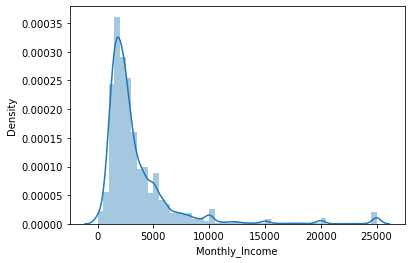

In [45]:
sns.distplot(monthly_income_clipped)
plt.show()

In [46]:
df[df.Monthly_Income>df.Monthly_Income.quantile(0.99)]['Approved'].value_counts()


0    622
1     12
Name: Approved, dtype: int64

# Null value imputation 
* using statistical tests, mode, median 

In [47]:
df1.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

ho- city cat and source cat are not related
ha- ho is not true

In [48]:
tbl = pd.crosstab(df1['City_Category'], df1['Source_Category'])
stats.chi2_contingency(tbl)


(1475.2909813252159,
 8.084269710528494e-309,
 12,
 array([[2.17209248e+00, 2.15848070e+04, 8.23512663e+03, 3.59843321e+02,
         7.60232369e+02, 3.32330150e+02, 1.86104884e+04],
        [3.18727413e-01, 3.16730054e+03, 1.20840186e+03, 5.28025080e+01,
         1.11554594e+02, 4.87652941e+01, 2.73085647e+03],
        [5.09180104e-01, 5.05989242e+03, 1.93047150e+03, 8.43541706e+01,
         1.78213036e+02, 7.79045559e+01, 4.36265513e+03]]))

* p-value <0.05 , so we reject h0 ,implies City_Category and Source_Category are related to each other

In [49]:
tbl

Source_Category,A,B,C,D,E,F,G
City_Category,,,,,,,
A,2,21148,8806,303,773,341,18512
B,0,2563,1796,44,92,83,2742
C,1,6101,772,150,185,35,4450


In [50]:
df1.loc[(df1.Source_Category == 'G') & (df1.City_Category.isna()), 'City_Category']='A'


* imputed none values in source category using mode

* ho - emp_cat and source_cat are not related
* ha- ho is not true

In [51]:
df2=df1.copy()

In [52]:
tbl = pd.crosstab(df2['Employer_Category1'], df2['Source_Category'])
stats.chi2_contingency(tbl), tbl


((151.83297537395342,
  2.4074505285129245e-26,
  12,
  array([[1.52230763e+00, 1.51068735e+04, 5.66653645e+03, 2.18197428e+02,
          5.31792800e+02, 2.29868453e+02, 1.15812090e+04],
         [8.24537636e-01, 8.18243665e+03, 3.06920393e+03, 1.18183728e+02,
          2.88038481e+02, 1.24505183e+02, 6.27280749e+03],
         [6.53154730e-01, 6.48168982e+03, 2.43125962e+03, 9.36188447e+01,
          2.28168719e+02, 9.86263643e+01, 4.96898347e+03]])),
 Source_Category     A      B     C    D    E    F      G
 Employer_Category1                                      
 A                   2  15404  5428  291  479  249  11483
 B                   1   8297  3017   64  303  114   6260
 C                   0   6070  2722   75  266   90   5080)

In [53]:
tbl

Source_Category,A,B,C,D,E,F,G
Employer_Category1,,,,,,,
A,2,15404,5428,291,479,249,11483
B,1,8297,3017,64,303,114,6260
C,0,6070,2722,75,266,90,5080


In [54]:
df2.loc[(df2.Source_Category=='F') & (df2.Employer_Category1.isna())]


,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
517,APPR20547696718,Female,1993-07-03,2016-02-07,C10029,C,NaN,NaN,NaN,133.3,...,N,S133,F,0.0,NaN,NaN,NaN,NaN,0,0
6103,APPB70673449948,Female,1987-08-31,2016-09-07,C10003,A,NaN,NaN,NaN,275.0,...,N,S122,F,0.0,NaN,NaN,NaN,NaN,0,0
6259,APPS20087734835,Female,1985-08-14,2016-10-07,C10028,C,NaN,NaN,NaN,250.0,...,N,S133,F,0.0,NaN,NaN,NaN,NaN,0,0
8003,APPS50767117236,Female,1988-08-15,2016-12-07,C10002,A,NaN,NaN,NaN,225.0,...,N,S133,F,0.0,NaN,NaN,NaN,NaN,0,0
9041,APPI50827547204,Female,1985-06-08,2016-07-14,C10001,A,NaN,NaN,NaN,166.7,...,N,S122,F,0.0,NaN,NaN,NaN,NaN,0,0
21071,APPX20618529942,Male,1993-09-12,2016-07-30,C10003,A,NaN,NaN,NaN,2500.0,...,Y,S122,F,0.0,NaN,NaN,NaN,NaN,0,0


In [55]:
df2['Employer_Category1'] = df2['Employer_Category1'].fillna('A')


* Imputation done on basis of mode

* ho - emp_cat1 and emp_cat2 are not related
* ha- ho is not true

In [56]:
tbl = pd.crosstab(df2['Employer_Category1'], df2['Employer_Category2'])
stats.chi2_contingency(tbl), tbl


((3620.8921746851556,
  0.0,
  6,
  array([[ 2151.68459833,   987.91530994,   818.63058931, 29097.76950241],
         [ 1175.30303447,   539.62363372,   447.15615684, 15893.91717496],
         [  931.01236719,   427.46105633,   354.21325384, 12590.31332263]])),
 Employer_Category2   1.0   2.0  3.0    4.0
 Employer_Category1                        
 A                   2069   291  196  30500
 B                    410  1113  921  15612
 C                   1779   551  503  11470)

In [57]:
tbl

Employer_Category2,1.0,2.0,3.0,4.0
Employer_Category1,,,,
A,2069,291,196,30500
B,410,1113,921,15612
C,1779,551,503,11470


In [58]:
df2['Employer_Category1'] = df2['Employer_Category1'].fillna('A')


In [59]:
df2['Employer_Category2'] = df2['Employer_Category2'].fillna(4)


* imputation done on basis of mode

* primary bank and city category

* ho - City_CategoryPrimary_Bank_Type andare not related
* ha- ho is not true

In [60]:
tbl = pd.crosstab(df2['City_Category'], df2['Primary_Bank_Type'])
stats.chi2_contingency(tbl), tbl


((3442.434162218691,
  0.0,
  2,
  array([[15329.04731275, 29334.95268725],
         [ 2147.10997646,  4108.89002354],
         [ 3226.84271079,  6175.15728921]])),
 Primary_Bank_Type      G      P
 City_Category                  
 A                  12365  32299
 B                   3070   3186
 C                   5268   4134)

In [61]:
tbl

Primary_Bank_Type,G,P
City_Category,,
A,12365,32299
B,3070,3186
C,5268,4134


In [62]:
df2.loc[(df2.City_Category=='A') & (df2.Primary_Bank_Type.isna())]


,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
112,APPV20785952136,Female,1987-08-30,2016-01-07,C10005,A,COM0000265,B,4.0,1700.0,...,N,S133,B,0.0,NaN,NaN,NaN,NaN,0,0
113,APPX70088104309,Male,1987-08-30,2016-01-07,C10005,A,COM0000265,B,4.0,2000.0,...,Y,S133,B,0.0,10000.0,2.0,NaN,NaN,4,0
131,APPP90838484136,Female,1991-04-30,2016-01-07,C10001,A,COM0055473,B,4.0,1800.0,...,N,S133,B,600.0,NaN,NaN,NaN,NaN,0,0
164,APPC50368689037,Male,1975-12-13,2016-01-07,C10006,A,COM0033955,A,4.0,20000.0,...,Y,S133,E,600.0,20000.0,5.0,15.50,481.0,10,0
171,APPJ60753287728,Male,1975-12-13,2016-01-07,C10006,A,COM0033973,C,4.0,19850.0,...,Y,S122,E,600.0,20000.0,5.0,15.50,481.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69619,APPP50413694745,Female,1986-11-18,2016-09-30,C10003,A,COM0053171,A,4.0,1500.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
69630,APPC10432434003,Female,1987-12-05,2016-09-30,C10003,A,COM0033144,B,4.0,1500.0,...,N,S122,G,199.2,NaN,NaN,NaN,NaN,0,0
69637,APPM60551988006,Male,1979-07-18,2016-09-30,C10001,A,COM0020197,A,4.0,4000.0,...,Y,S122,G,0.0,85000.0,4.0,15.25,2376.0,10,0
69698,APPD90796759944,Male,1987-12-22,2016-09-30,C10001,A,COM0009891,A,4.0,3200.0,...,Y,S122,G,NaN,50000.0,5.0,NaN,NaN,0,0


In [63]:
df2.loc[(df2['City_Category'] == 'A') & (df2['Primary_Bank_Type'].isna()), 'Primary_Bank_Type'] = 'P'
df2.loc[(df2['City_Category'] == 'B') & (df2['Primary_Bank_Type'].isna()), 'Primary_Bank_Type'] = 'P'
df2.loc[(df2['City_Category'] == 'C') & (df2['Primary_Bank_Type'].isna()), 'Primary_Bank_Type'] = 'G'


* imputation done on basis of mode

In [64]:
df2.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                              0
Employer_Code                           4018
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                          0
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

In [65]:
df2.loc[:,['Monthly_Income','Existing_EMI']].corr()


,Monthly_Income,Existing_EMI
Monthly_Income,1.000000,0.245826
Existing_EMI,0.245826,1.000000


In [66]:
df2.loc[(df2.Approved==1)&(df2.Existing_EMI.isnull())]

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
68847,APPE70691144005,Male,1988-12-22,2016-09-30,C10005,A,COM0009891,A,4.0,2500.0,...,Y,S122,G,NaN,10000.0,3.0,15.5,349.0,7,1


In [67]:
df2.loc[df2.Existing_EMI.isna(),'Existing_EMI'] = df2.Existing_EMI.fillna(0)


In [68]:
df.groupby('Source')['Customer_Existing_Primary_Bank_Code'].agg(pd.Series.mode)

Source
S122                  B001
S123                  B002
S124                  B001
S127                  B001
S129    [B001, B004, B012]
S130                  B003
S133                  B001
S134                  B001
S135                  B001
S136                  B003
S137                  B002
S138          [B002, B010]
S139                  B002
S140                    []
S141                  B001
S143                  B001
S144                  B003
S150                  B007
S151                  B003
S153                  B003
S154                  B001
S155                  B004
S156                  B003
S157                  B001
S158                  B003
S159                  B001
S160          [B003, B022]
S161                  B003
S162                  B002
Name: Customer_Existing_Primary_Bank_Code, dtype: object

In [69]:
df2.drop('Customer_Existing_Primary_Bank_Code',axis=1,inplace=True)



In [75]:
df.Customer_Existing_Primary_Bank_Code.unique()

array(['B001', 'B002', 'B003', 'B014', 'B006', 'B017', nan, 'B004',
       'B023', 'B011', 'B022', 'B009', 'B021', 'B016', 'B033', 'B043',
       'B005', 'B028', 'B008', 'B047', 'B024', 'B032', 'B010', 'B020',
       'B031', 'B025', 'B018', 'B007', 'B012', 'B039', 'B015', 'B026',
       'B030', 'B037', 'B045', 'B041', 'B013', 'B044', 'B019', 'B036',
       'B042', 'B027', 'B038', 'B034', 'B035', 'B040', 'B029', 'B046',
       'B055', 'B049', 'B048', 'B050', 'B051', 'B056', 'B053', 'B054',
       'B052', 'B057'], dtype=object)

In [76]:
df2.isnull().sum()

ID                        0
Gender                    0
DOB                      15
Lead_Creation_Date        0
City_Code               814
City_Category             0
Employer_Code          4018
Employer_Category1        0
Employer_Category2        0
Monthly_Income            0
Primary_Bank_Type         0
Contacted                 0
Source                    0
Source_Category           0
Existing_EMI              0
Loan_Amount           27709
Loan_Period           27709
Interest_Rate         47437
EMI                   47437
Var1                      0
Approved                  0
dtype: int64

# Feature Engineering

In [77]:
df2['Age']=df2.Lead_Creation_Date.dt.year-df2.DOB.dt.year

In [78]:
age_=[]
for i in df2['Age']:
    if i<0:
        age_.append(i+100)
    elif i<18 :
        age_.append(18)
    else:
        age_.append(i)

In [79]:
df2['Age']=age_

In [80]:
df2['Lead_Creation_Month']=df2.Lead_Creation_Date.dt.month

In [81]:
df2.groupby(['Lead_Creation_Month'])['Approved'].value_counts()

Lead_Creation_Month  Approved
1                    0            1967
                     1              27
2                    0            3173
                     1              27
3                    0            1965
                     1              38
4                    0            2255
                     1              43
5                    0            2435
                     1              41
6                    0            2188
                     1              32
7                    0           15251
                     1             215
8                    0           15653
                     1             266
9                    0           18214
                     1             232
10                   0            1581
                     1              35
11                   0            1778
                     1              22
12                   0            2233
                     1              42
Name: Approved, dtype: int64

* Most of the leads have been generated in july, august, setember

In [82]:
df2.loc[df2.Age.isna(), 'Age'] = df2.Age.median()

In [83]:
def Age_Cat(x) :
    if x <= 25 :
        return('Young')
    elif (x>25) and (x<=40) :
        return('Middle-Aged')
    elif (x>40) and (x<=60) :
        return('Aged')
    else :
        return('Old')

In [84]:
df2['Age_Cat']=df2.Age.apply(Age_Cat)

In [85]:
df2.Age_Cat.value_counts()

Middle-Aged    48120
Young          15066
Aged            6389
Old              138
Name: Age_Cat, dtype: int64

* Most of the leads are middle-aged and young people

In [86]:
from scipy.stats import ttest_ind

ttest_ind(df2.Age,df2.Monthly_Income)

Ttest_indResult(statistic=-8.447515953465922, pvalue=3.003711525935521e-17)

* There is a realtion between age and monthly income

In [87]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols


In [88]:
anova_lm(ols('Monthly_Income~Age_Cat', data = df2).fit()) 

,df,sum_sq,mean_sq,F,PR(>F)
Age_Cat,3.0,1.677955e+11,5.593182e+10,1.831282,0.139018
Residual,69709.0,2.129082e+15,3.054243e+10,NaN,NaN


* The category Age_cat created is relevent

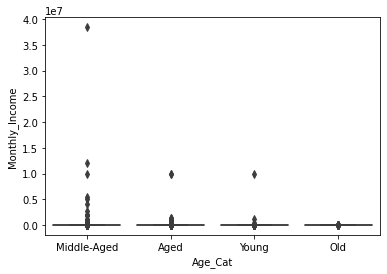

In [89]:
sns.boxplot(x = 'Age_Cat', y = 'Monthly_Income', data = df2)
plt.show()

* Most of the applicants are middle_aged

In [90]:
freq = pd.crosstab(df2.Employer_Category1,df2.Age_Cat)

stats.chi2_contingency(freq)[1] 

1.2251165635044389e-207

* Employer categoryy 1 and age category might be related

In [91]:
freq = pd.crosstab(df2.Employer_Category2,df2.Age_Cat)

stats.chi2_contingency(freq)[1]

4.1438017964944525e-68

* Employer category 2 and age category might be related

In [92]:
df2.groupby(['Age_Cat','Employer_Category1'])['Monthly_Income'].median()

Age_Cat      Employer_Category1
Aged         A                     3000.0
             B                     3100.0
             C                     3600.0
Middle-Aged  A                     2500.0
             B                     2800.0
             C                     2700.0
Old          A                     2500.0
             B                     3000.0
             C                     3000.0
Young        A                     1800.0
             B                     1889.5
             C                     1800.0
Name: Monthly_Income, dtype: float64

* There is an obvious trend between monthly income and age category

In [93]:
df2.groupby(['Age_Cat','City_Category'])['Monthly_Income'].median()

Age_Cat      City_Category
Aged         A                3350.0
             B                3000.0
             C                3000.0
Middle-Aged  A                2750.0
             B                2281.3
             C                2150.0
Old          A                2500.0
             B                2432.3
             C                2500.0
Young        A                1900.0
             B                1600.0
             C                1550.0
Name: Monthly_Income, dtype: float64

* There seems to be a relatioship between age, city category and the median income of the applicants/leads

In [94]:
df2.groupby(['Age_Cat','Employer_Category2'])['Monthly_Income'].median() 

Age_Cat      Employer_Category2
Aged         1.0                   4550.00
             2.0                   5000.00
             3.0                   3580.00
             4.0                   3007.70
Middle-Aged  1.0                   3800.00
             2.0                   3350.00
             3.0                   2351.50
             4.0                   2500.00
Old          1.0                   3112.25
             4.0                   2500.00
Young        1.0                   2300.00
             2.0                   2100.00
             3.0                   1710.00
             4.0                   1800.00
Name: Monthly_Income, dtype: float64

*  We can infer that EC2 has been categorized in a way that cat 1 and 4 are related to buisnesses where as 2 & 3 may be related to conventional workforce.(yeh bolna theek nhi h baaki dekhlo)

In [95]:
df2.groupby('Employer_Code')['ID'].nunique()

Employer_Code
COM0000002    457
COM0000003    324
COM0000004    262
COM0000005    243
COM0000006    195
             ... 
COM0057157      1
COM0057158      1
COM0057159      1
COM0057160      1
COM0057164      1
Name: ID, Length: 36617, dtype: int64

* Maximum apllicants are from Company encoded as COM0000002.

In [96]:
df2.groupby(['Employer_Code','Employer_Category1','Employer_Category2'])['ID'].nunique().sort_values(ascending = True)   

Employer_Code  Employer_Category1  Employer_Category2
COM0024329     A                   4.0                     1
COM0035274     B                   4.0                     1
COM0035272     A                   4.0                     1
COM0035271     A                   4.0                     1
COM0035270     B                   4.0                     1
                                                        ... 
COM0000006     C                   1.0                   195
COM0000005     A                   1.0                   243
COM0000004     B                   2.0                   262
COM0000003     B                   2.0                   324
COM0000002     C                   1.0                   457
Name: ID, Length: 36617, dtype: int64

* Hypothesis - EC2 cat 4 may relate to small buisness. ## Need strong evidence from Income data// Checking for the same.

In [97]:
df2.Employer_Code.value_counts() 

COM0000002    457
COM0000003    324
COM0000004    262
COM0000005    243
COM0000006    195
             ... 
COM0032218      1
COM0056242      1
COM0045406      1
COM0022947      1
COM0055068      1
Name: Employer_Code, Length: 36617, dtype: int64

* seeing so many emplloyees related to 1 employer code , we categorise them into companies

#### Categorizing Employer_Code -

* 1.Very Small Scale Family Buisness (VSF) - 1 to 5
* 2.Moderately Small Scale Family & Friends Business(MSF) - 5 to 10
* 3.Micro Small and Medium Enterprises(MSME) - 10 to 50
* 4.Medium Private Enterprises(PVT) - 50 to 100
* 5.Medium to Big Corporates(CP) - 100 to 500

In [98]:
def EC(x) :
    if x <=5 :
        return('VSF')
    elif (x>5) and (x<=10) :
        return('MSF')
    elif (x>10) and (x<=50) :
        return('MSME')
    elif (x>50) and (x<=100) :
        return('PVT')
    elif (x>100) and (x<=500) :
        return('CP')
    else :
        return('Missing')

In [99]:
x = df2.Employer_Code.value_counts()

In [100]:
df2['EC3'] = df2.Employer_Code.map(x)
df2['Employer_Cat3'] = df2.EC3.apply(EC)

In [101]:
df2.drop('EC3',axis=1,inplace=True)

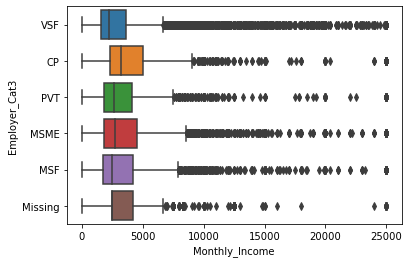

In [102]:
sns.boxplot(y=df2.Employer_Cat3,x=df2.Monthly_Income.clip(upper=df2.Monthly_Income.quantile(0.99)))
plt.show()


* The median monthly income in VSF is low as compared to other categories, corporates have the highest media n monthly income

In [103]:
df2.isnull().sum()

ID                         0
Gender                     0
DOB                       15
Lead_Creation_Date         0
City_Code                814
City_Category              0
Employer_Code           4018
Employer_Category1         0
Employer_Category2         0
Monthly_Income             0
Primary_Bank_Type          0
Contacted                  0
Source                     0
Source_Category            0
Existing_EMI               0
Loan_Amount            27709
Loan_Period            27709
Interest_Rate          47437
EMI                    47437
Var1                       0
Approved                   0
Age                        0
Lead_Creation_Month        0
Age_Cat                    0
Employer_Cat3              0
dtype: int64

In [104]:
df2.drop(['DOB','Lead_Creation_Date'],axis=True,inplace=True)

In [105]:
df2.head()

,ID,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,...,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age,Lead_Creation_Month,Age_Cat,Employer_Cat3
0,APPC90493171225,Female,C10001,A,COM0044082,A,4.0,2000.0,P,N,...,NaN,NaN,NaN,NaN,0,0,37.0,7,Middle-Aged,VSF
1,APPD40611263344,Male,C10003,A,COM0000002,C,1.0,3500.0,P,Y,...,20000.0,2.0,13.25,953.0,10,0,30.0,4,Middle-Aged,CP
2,APPE70289249423,Male,C10125,C,COM0005267,C,4.0,2250.0,G,Y,...,45000.0,4.0,NaN,NaN,0,0,34.0,7,Middle-Aged,VSF
3,APPF80273865537,Male,C10477,C,COM0004143,A,4.0,3500.0,G,Y,...,92000.0,5.0,NaN,NaN,7,0,27.0,9,Middle-Aged,VSF
4,APPG60994436641,Male,C10002,A,COM0001781,A,4.0,10000.0,P,Y,...,50000.0,2.0,NaN,NaN,10,0,31.0,7,Middle-Aged,VSF


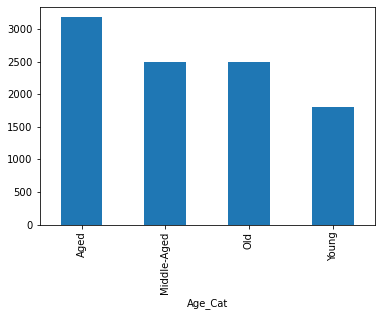

In [106]:
df2.groupby('Age_Cat')['Monthly_Income'].median().plot(kind='bar')
plt.show()

* Aged people have highest median monthly income, this might be because of their experience

(0.0, 10000.0)

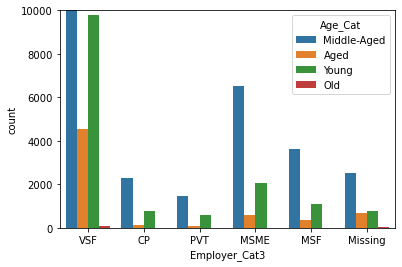

In [107]:
sns.countplot(df2.Employer_Cat3, hue = df2['Age_Cat'])
plt.ylim(0, 10000)

(0.0, 10000.0)

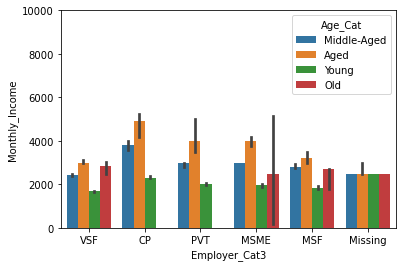

In [108]:
sns.barplot(y = df2.Monthly_Income,x = df2.Employer_Cat3, hue = df2.Age_Cat,estimator=np.median)
plt.ylim(0,10000)

* Old people don't exist in pvt and corporate companies
* Aged people have the highest income across all categories

In [109]:
df2.Monthly_Income.max()

38383838.3

This person got featured because he is rich but needs
150000 against a monthly income of 38 million

In [110]:
df2.loc[df2.Monthly_Income==38383838.3,['Gender','Approved','Loan_Amount','Interest_Rate','EMI','Existing_EMI','Employer_Category1','Employer_Category2','Employer_Cat3','City_Code','City_Category','Source','Source_Category','Age','Employer_Code','Monthly_Income']]

,Gender,Approved,Loan_Amount,Interest_Rate,EMI,Existing_EMI,Employer_Category1,Employer_Category2,Employer_Cat3,City_Code,City_Category,Source,Source_Category,Age,Employer_Code,Monthly_Income
38774,Male,0,150000.0,13.5,4061.0,0.0,A,4.0,VSF,C10001,A,S122,C,30.0,COM0034525,38383838.3


# Checking relationships with target

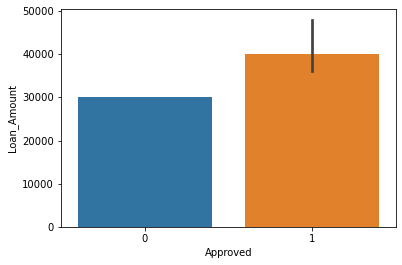

In [111]:
sns.barplot(y = 'Loan_Amount', x ='Approved' , data = df2,estimator=np.median)
plt.show()

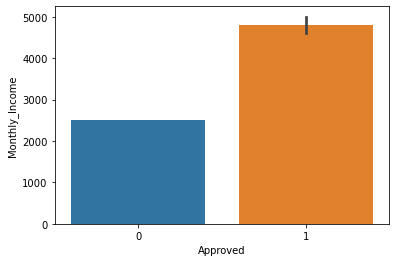

In [112]:
sns.barplot(y = 'Monthly_Income', x ='Approved' , data = df2,estimator=np.median) 
plt.show()

In [113]:
pd.crosstab(df2.Employer_Cat3,df2.Approved,normalize=True)

Approved,0,1
Employer_Cat3,,
CP,0.044325,0.001004
MSF,0.071622,0.001621
MSME,0.128756,0.002797
Missing,0.057565,0.000072
PVT,0.030525,0.000674
VSF,0.652576,0.008463


<function matplotlib.pyplot.show(close=None, block=None)>

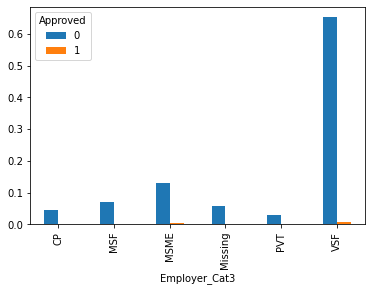

In [114]:
pd.crosstab(df2.Employer_Cat3,df2.Approved,normalize=True).plot(kind='bar')
plt.show


In [115]:
df2.dropna(subset=['City_Code','Employer_Code'], axis = 0,inplace=True)

In [116]:
df2.drop('ID',axis=1,inplace=True)

In [117]:
df2.columns

Index(['Gender', 'City_Code', 'City_Category', 'Employer_Code',
       'Employer_Category1', 'Employer_Category2', 'Monthly_Income',
       'Primary_Bank_Type', 'Contacted', 'Source', 'Source_Category',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI',
       'Var1', 'Approved', 'Age', 'Lead_Creation_Month', 'Age_Cat',
       'Employer_Cat3'],
      dtype='object')

In [118]:
df2_wo_EMI=df2.drop('EMI',axis=1)

In [119]:
X=df2.drop('Approved',axis=1)
y=df2.Approved

In [120]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=10)

In [121]:
num_train = xtrain.select_dtypes(include = np.number).drop('Employer_Category2', axis = 1)

In [122]:
cat_train = xtrain.select_dtypes(include = 'object').drop(['City_Code','Employer_Code','Source'], axis = 1)

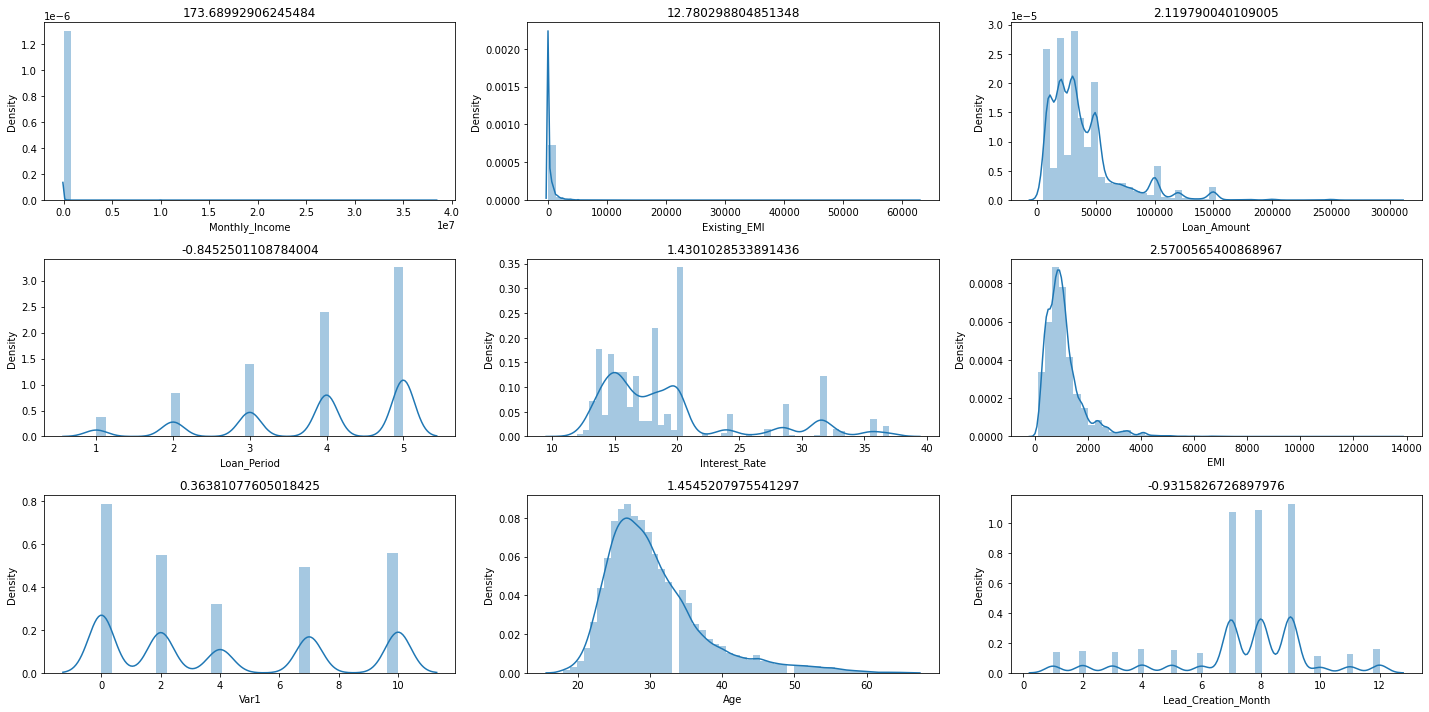

In [123]:
a = 3
b = 3
c = 1

plt.figure(figsize = [20,10])
for i in num_train.columns :
    plt.subplot(a,b,c)
    plt.title(num_train[i].skew())
    sns.distplot(num_train[i])
    c+=1
    
plt.tight_layout()
plt.show()

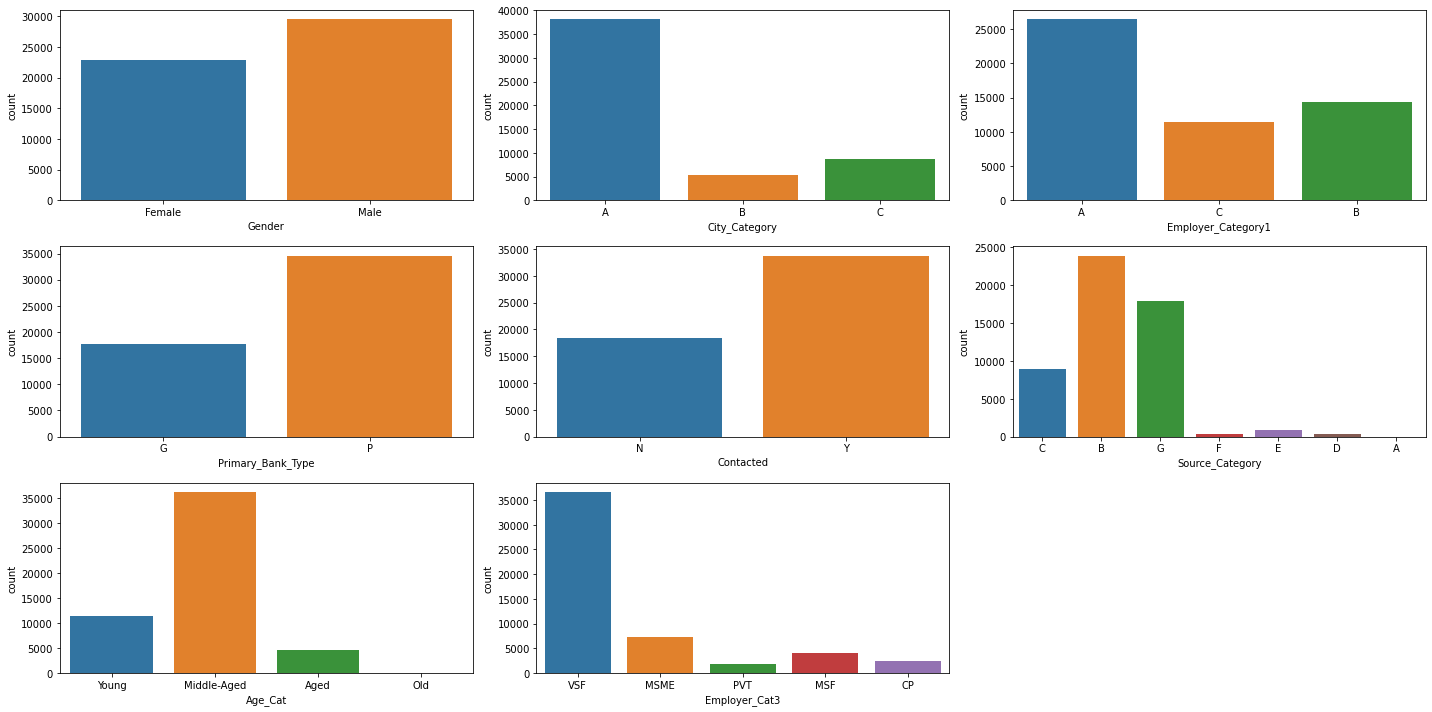

In [124]:
a = 3
b = 3
c = 1

plt.figure(figsize = [20,10])
for i in cat_train.columns :
    plt.subplot(a,b,c)
    sns.countplot(cat_train[i])
    c+=1
    
plt.tight_layout()
plt.show()

## Encoding

In [125]:
lb=LabelBinarizer()
oe=OrdinalEncoder()

In [126]:
xtrain_gen = pd.DataFrame(lb.fit_transform(xtrain.loc[:,['Gender']]), columns=['Gender']).reset_index(drop=True)
xtest_gen = pd.DataFrame(lb.transform(xtest.loc[:,['Gender']]), columns=['Gender']).reset_index(drop=True)

xtrain_cont = pd.DataFrame(lb.fit_transform(xtrain.loc[:,['Contacted']]), columns=['Contacted']).reset_index(drop=True)
xtest_cont = pd.DataFrame(lb.transform(xtest.loc[:,['Contacted']]), columns=['Contacted']).reset_index(drop=True)

xtrain_bank = pd.DataFrame(lb.fit_transform(xtrain.loc[:,['Primary_Bank_Type']]), columns=['Primary_Bank_Type']).reset_index(drop=True)
xtest_bank = pd.DataFrame(lb.transform(xtest.loc[:,['Primary_Bank_Type']]), columns=['Primary_Bank_Type']).reset_index(drop=True)


In [127]:
xtrain_bank = pd.DataFrame(lb.fit_transform(xtrain.loc[:,['Primary_Bank_Type']]), columns=['Primary_Bank_Type']).reset_index(drop=True)
xtest_bank = pd.DataFrame(lb.transform(xtest.loc[:,['Primary_Bank_Type']]), columns=['Primary_Bank_Type']).reset_index(drop=True)
xtrain_oe = pd.get_dummies(xtrain.loc[:,['City_Category','Employer_Category1','Source_Category','Age_Cat','Employer_Cat3']],drop_first=True).reset_index(drop=True)
xtest_oe = pd.get_dummies(xtest.loc[:,['City_Category','Employer_Category1','Source_Category','Age_Cat','Employer_Cat3']],drop_first=True).reset_index(drop=True)

* We dropped employer codde because of redundency

In [128]:
xtrain.loc[:,['City_Code','Source']].head()

,City_Code,Source
4785,C10002,S133
25261,C10014,S133
17120,C10003,S133
29647,C10137,S159
9350,C10008,S133


* we remove S and C from source and city code respectively

In [129]:
xtrain.loc[:, 'City_Code'] = xtrain.City_Code.str[1:].astype(int)
xtrain.loc[:, 'Source'] = xtrain.Source.str[1:].astype(int)
xtest.loc[:, 'City_Code'] = xtest.City_Code.str[1:].astype(int)
xtest.loc[:, 'Source'] = xtest.Source.str[1:].astype(int)

In [130]:
xtrain

,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source,...,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Age,Lead_Creation_Month,Age_Cat,Employer_Cat3
4785,Female,10002,A,COM0056739,A,4.0,1680.0,G,N,133,...,0.0,NaN,NaN,NaN,NaN,0,25.0,7,Young,VSF
25261,Male,10014,B,COM0026396,A,4.0,1350.0,P,Y,133,...,0.0,30000.0,5.0,20.00,795.0,2,28.0,5,Middle-Aged,VSF
17120,Female,10003,A,COM0000080,C,1.0,5200.0,P,N,133,...,0.0,NaN,NaN,NaN,NaN,10,26.0,7,Middle-Aged,MSME
29647,Female,10137,C,COM0043495,A,4.0,1500.0,P,N,159,...,0.0,NaN,NaN,NaN,NaN,0,25.0,12,Young,VSF
9350,Male,10008,A,COM0034256,A,4.0,1500.0,P,Y,133,...,600.0,11000.0,5.0,20.00,291.0,2,28.0,7,Middle-Aged,VSF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28224,Female,10001,A,COM0000017,C,1.0,1400.0,P,N,153,...,0.0,NaN,NaN,NaN,NaN,0,26.0,10,Middle-Aged,CP
52840,Male,10004,A,COM0000094,B,3.0,3700.0,P,Y,122,...,0.0,30000.0,3.0,NaN,NaN,10,30.0,12,Middle-Aged,MSME
29413,Male,10009,B,COM0028171,A,4.0,4000.0,G,Y,133,...,0.0,100000.0,5.0,15.25,2392.0,10,25.0,11,Young,VSF
40371,Male,10219,C,COM0022358,A,4.0,1000.0,G,Y,153,...,100.0,8000.0,2.0,NaN,NaN,2,33.0,8,Middle-Aged,VSF


In [131]:
woe = WOE()

woe.fit(xtrain, ytrain)

clf_train= woe.transform(xtrain)
clf_train.head()

,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source,...,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Age,Lead_Creation_Month,Age_Cat,Employer_Cat3
4785,-0.600537,0.148588,0.097853,0.0,-0.382525,-0.054212,-4.232558,-0.529112,-0.780405,0.059791,...,-0.258899,-0.793831,-0.793831,-0.262669,-0.262669,-0.978301,-0.715888,-0.000949,-1.093195,-0.176589
25261,0.302521,-0.267721,-0.010288,0.0,-0.382525,-0.054212,-4.232558,0.191916,0.262554,0.059791,...,-0.258899,-0.021198,0.251846,-0.354264,-0.070589,-1.720984,0.132133,-0.000949,0.160063,-0.176589
17120,-0.600537,0.148588,0.097853,0.0,0.349288,0.276227,0.877714,0.191916,-0.780405,0.059791,...,-0.258899,-0.793831,-0.793831,-0.262669,-0.262669,1.027697,-0.715888,-0.000949,0.160063,0.267050
29647,-0.600537,-0.267721,-0.576951,0.0,-0.382525,-0.054212,-4.232558,0.191916,-0.780405,-0.279869,...,-0.258899,-0.793831,-0.793831,-0.262669,-0.262669,-0.978301,-0.715888,-0.092329,-1.093195,-0.176589
9350,0.302521,0.034822,0.097853,0.0,-0.382525,-0.054212,-4.232558,0.191916,0.262554,0.059791,...,0.385203,0.110352,0.251846,-0.354264,0.292778,-1.720984,0.132133,-0.000949,0.160063,-0.176589


In [132]:
clf_test = woe.transform(xtest)
clf_test.head()

,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source,...,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Age,Lead_Creation_Month,Age_Cat,Employer_Cat3
14707,0.302521,0.034822,0.097853,4.146522,0.228538,-0.054212,0.877714,0.191916,0.262554,0.059791,...,-0.258899,0.612164,0.251846,-0.262669,-0.262669,0.220575,0.132133,-0.000949,0.160063,-0.176589
41442,-0.600537,0.148588,0.097853,COM0013262,0.228538,-0.054212,-4.232558,-0.529112,-0.780405,0.059791,...,-0.258899,-0.793831,-0.793831,-0.262669,-0.262669,-0.978301,-0.715888,0.016311,-1.093195,-0.176589
1818,0.302521,0.034822,0.097853,0.0,-0.382525,-0.054212,0.877714,0.191916,0.262554,-0.279869,...,-0.258899,0.612164,0.251846,1.157333,0.738157,1.027697,0.132133,-0.000949,0.160063,0.267050
30115,0.302521,-0.267721,-0.576951,COM0047421,-0.382525,-0.054212,-0.409401,0.191916,0.262554,0.059791,...,0.385203,0.110352,0.281787,-0.354264,0.292778,0.220575,-0.715888,-0.092329,-1.093195,-0.176589
42792,-0.600537,-0.267721,-0.576951,0.0,-0.382525,-0.054212,-0.409401,-0.529112,-0.780405,0.059791,...,0.385203,-0.793831,-0.793831,-0.262669,-0.262669,-0.978301,0.413106,0.016311,0.160063,-0.176589


In [133]:
clf_train_new = clf_train.loc[:,['City_Code','Source']].reset_index(drop = True)

In [134]:
xtrain_cat_rest = xtrain[['Employer_Category2', 'Var1', 'Lead_Creation_Month']].reset_index(drop=True)

In [135]:
xtrain_encoded_cat = pd.concat([xtrain_gen, xtrain_cont, xtrain_bank, xtrain_oe, xtrain_cat_rest, clf_train_new], axis = 1)

In [136]:
xtrain_encoded_cat.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,...,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,4.0,0,7,0.148588,0.059791
1,1,1,1,1,0,0,0,0,1,0,...,0,0,0,0,1,4.0,2,5,-0.267721,0.059791
2,0,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,1.0,10,7,0.148588,0.059791
3,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,4.0,0,12,-0.267721,-0.279869
4,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,4.0,2,7,0.034822,0.059791


In [137]:
clf_test_new = clf_test.loc[:,['City_Code','Source']].reset_index(drop = True)

In [138]:
xtest_cat_rest = xtest[['Employer_Category2', 'Var1', 'Lead_Creation_Month']].reset_index(drop=True)

In [139]:
xtest_encoded_cat = pd.concat([xtest_gen, xtest_cont, xtest_bank, xtest_oe, xtest_cat_rest, clf_test_new], axis = 1)

In [140]:
xtest_encoded_cat.shape

(13068, 25)

# Preparing the data for imputation 

In [141]:
xtrain_num = xtrain.select_dtypes(include='number')
xtrain_num = xtrain_num.drop(['City_Code', 'Employer_Category2', 'Source', 'Var1', 'Lead_Creation_Month'], axis=1).reset_index(drop=True)

In [142]:
xtest_num = xtest.select_dtypes(include='number')
xtest_num = xtest_num.drop(['City_Code', 'Employer_Category2', 'Source', 'Var1', 'Lead_Creation_Month'], axis=1).reset_index(drop=True)

In [143]:
xtrain_final = pd.concat([xtrain_encoded_cat, xtrain_num], axis = 1)

In [144]:
xtest_final = pd.concat([xtest_encoded_cat, xtest_num], axis = 1)

In [145]:
print(xtest_final.shape,xtrain_final.shape)

(13068, 32) (52270, 32)


## * Missing value imputation

In [146]:
it = IterativeImputer(estimator = KNeighborsRegressor() )

x_train = it.fit_transform(xtrain_final)

imputed_train = pd.DataFrame(x_train, columns = xtrain_final.columns)

x_test = it.transform(xtest_final)

imputed_test = pd.DataFrame(x_test, columns = xtest_final.columns)

## Visualising distributions before and after imputation

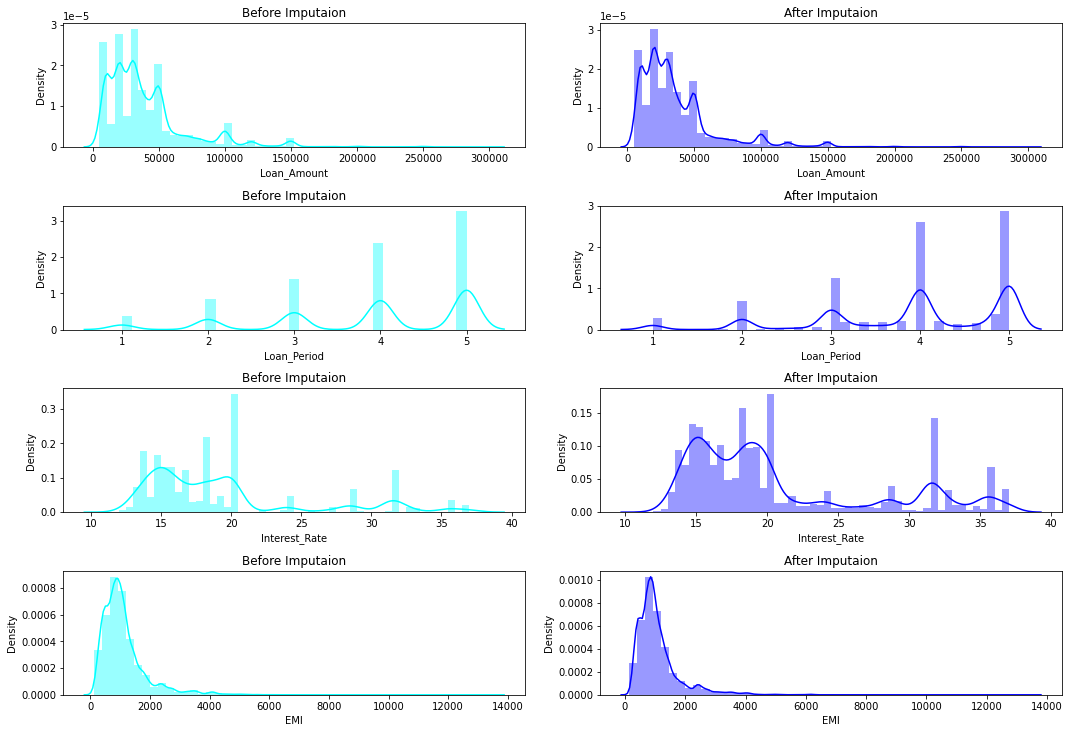

In [147]:
plt.figure(figsize=[15,20])
x=1
for i  in ['Loan_Amount','Loan_Period','Interest_Rate','EMI']:
        plt.subplot(8,2,x)
        plt.title('Before Imputaion')
        sns.distplot(xtrain_final[i],color='cyan')
        x=x+1
        plt.subplot(8,2,x)
        plt.title('After Imputaion')
        sns.distplot(imputed_train[i],color='blue')
        x=x+1
plt.tight_layout()
plt.show()
        
        

*  The distributions look the same before and after imputation, except the count of values has increased (not in case of EMI).

# Feature Engineering

* Imputing EMI manually using the below mentioned formula

EMI Formula = p * r * (1+r)^n/((1+r)^n-1)

In [148]:
imputed_train['loan_period_months']=imputed_train['Loan_Period']*12

In [149]:
p = imputed_train.Loan_Amount
R = imputed_train.Interest_Rate
n = imputed_train.loan_period_months
r = R/(12*100)

In [150]:
imputed_train['emi_recal'] = p * r * ((1+r)**n)/((1+r)**n - 1)

In [151]:
imputed_train['emi_recal'] = np.round(imputed_train['emi_recal'] ,0)

In [152]:
imputed_train['EMI']=xtrain_final.EMI

In [153]:
imputed_train.drop('EMI',axis=1,inplace=True)

In [154]:
imputed_test['loan_period_months']=imputed_test['Loan_Period']*12

p = imputed_test.Loan_Amount
R = imputed_test.Interest_Rate
n = imputed_test.loan_period_months
r = R/(12*100)

imputed_test['emi_recal'] = p * r * ((1+r)**n)/((1+r)**n - 1)

imputed_test['emi_recal'] = np.round(imputed_test['emi_recal'] ,0)

imputed_test['EMI']=xtest_final.EMI

imputed_test.drop('EMI',axis=1,inplace=True)

* Creating new features using emi_recal,monthly income, loan period :
 'EMI-Monthly_Income_Ratio','Income_loan_Ratio'

In [155]:
imputed_train['Income_in_loan_period'] = imputed_train.Monthly_Income *12* (pow((1 + 3 / 100), imputed_train.Loan_Period))

In [156]:
imputed_train['EMI-Monthly_Income_Ratio']=(imputed_train.emi_recal+imputed_train.Existing_EMI)/(imputed_train.Monthly_Income)

In [157]:
imputed_train['Income_loan_Ratio']=imputed_train.Loan_Amount/imputed_train.Income_in_loan_period

In [158]:
imputed_train.drop('Income_in_loan_period',axis=1,inplace=True)

In [159]:
imputed_train.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,...,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Age,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1680.0,0.0,19600.0,3.4,18.040,25.0,40.8,646.0,0.384524,0.879263
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1350.0,0.0,30000.0,5.0,20.000,28.0,60.0,795.0,0.588889,1.597424
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5200.0,0.0,90000.0,4.4,15.108,26.0,52.8,2344.0,0.450769,1.266409
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1500.0,0.0,22000.0,4.0,35.500,25.0,48.0,864.0,0.576000,1.085929
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1500.0,600.0,11000.0,5.0,20.000,28.0,60.0,291.0,0.594000,0.527150


In [160]:
imputed_test['Income_in_loan_period'] = imputed_test.Monthly_Income *12* (pow((1 + 3 / 100), imputed_test.Loan_Period))

imputed_test['EMI-Monthly_Income_Ratio']=(imputed_test.emi_recal+imputed_test.Existing_EMI)/(imputed_test.Monthly_Income)

imputed_test['Income_loan_Ratio']=imputed_test.Loan_Amount/imputed_test.Income_in_loan_period

imputed_test.drop('Income_in_loan_period',axis=1,inplace=True)

In [161]:
imputed_test.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,...,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Age,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3550.0,0.0,57000.0,5.0,14.264,31.0,60.0,1334.0,0.375775,1.154195
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1000.0,0.0,27000.0,4.8,18.950,20.0,57.6,717.0,0.717000,1.952378
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,8000.0,0.0,139000.0,5.0,14.850,31.0,60.0,3296.0,0.412000,1.248986
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2800.0,900.0,10000.0,2.0,20.000,24.0,24.0,509.0,0.503214,0.280534
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2625.0,1000.0,18600.0,4.0,20.800,35.0,48.0,574.0,0.599619,0.524630


## Interest rate binning

In [162]:
interest_binn=[]
for i in imputed_train.Interest_Rate:
    if i > 11 and i<=15:
        interest_binn.append('IR_11-15')
    elif i>15 and i<=20:
        interest_binn.append('IR_15-20')
    elif i>20 and i<=25:
        interest_binn.append('IR_20-25')
    else:
        interest_binn.append('IR_25+')
imputed_train['Interest_Bins']=interest_binn

In [163]:
interest_binn=[]
for i in imputed_test.Interest_Rate:
    if i > 11 and i<=15:
        interest_binn.append('IR_11-15')
    elif i>15 and i<=20:
        interest_binn.append('IR_15-20')
    elif i>20 and i<=25:
        interest_binn.append('IR_20-25')
    else:
        interest_binn.append('IR_25+')
imputed_test['Interest_Bins']=interest_binn

In [180]:
xtrain_ekdum_final=pd.concat([imputed_train.drop(['Interest_Bins','Age'],axis=1),pd.get_dummies(imputed_train.Interest_Bins,drop_first=True)],axis=1)

In [186]:
xtrain_ekdum_final.shape

(52270, 37)

In [188]:
xtest_ekdum_final=pd.concat([imputed_test.drop(['Interest_Bins','Age'],axis=1),pd.get_dummies(imputed_test.Interest_Bins,drop_first=True)],axis=1)

In [190]:
xtrain_ekdum_final.columns

Index(['Gender', 'Contacted', 'Primary_Bank_Type', 'City_Category_B',
       'City_Category_C', 'Employer_Category1_B', 'Employer_Category1_C',
       'Source_Category_B', 'Source_Category_C', 'Source_Category_D',
       'Source_Category_E', 'Source_Category_F', 'Source_Category_G',
       'Age_Cat_Middle-Aged', 'Age_Cat_Old', 'Age_Cat_Young',
       'Employer_Cat3_MSF', 'Employer_Cat3_MSME', 'Employer_Cat3_PVT',
       'Employer_Cat3_VSF', 'Employer_Category2', 'Var1',
       'Lead_Creation_Month', 'City_Code', 'Source', 'Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate',
       'loan_period_months', 'emi_recal', 'EMI-Monthly_Income_Ratio',
       'Income_loan_Ratio', 'IR_15-20', 'IR_20-25', 'IR_25+'],
      dtype='object')

In [192]:
xtrain_ekdum_final.to_csv('xtrain_ekdum_final')

In [193]:
xtest_ekdum_final.to_csv('xtest_ekdum_final')